## Popularity Based Recommendation

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import KNNWithMeans
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from collections import defaultdict
from surprise.model_selection import train_test_split
%matplotlib inline

### Importing ratings Files

In [182]:
# There are 7824482 records so taking 10% of it 104857 nrows=782448
df_ratings = pd.read_csv('ratings_Electronics.csv',header=None, names=['userId','productId','ratings','timestamp'],nrows=782448)


In [183]:
df_ratings.head(10)

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


In [184]:
len(df_ratings)

782448

In [185]:
df_ratings=df_ratings.drop('timestamp',axis=1)

In [186]:
df_ratings.head()

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [187]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782448 entries, 0 to 782447
Data columns (total 3 columns):
userId       782448 non-null object
productId    782448 non-null object
ratings      782448 non-null float64
dtypes: float64(1), object(2)
memory usage: 17.9+ MB


In [188]:
df_ratings.describe()

,ratings
count,782448.000000
mean,3.981954
std,1.396133
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [189]:
rating_range =df_ratings['ratings'].unique()

In [190]:
sorted(rating_range)

[1.0, 2.0, 3.0, 4.0, 5.0]

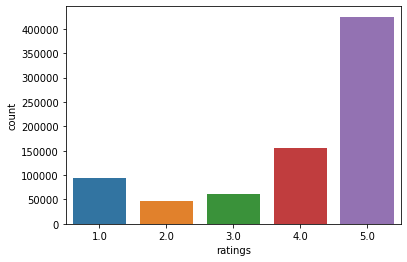

In [191]:
sns.countplot(df_ratings['ratings'])

In [192]:
df_ratings['ratings'].value_counts()

5.0    424798
4.0    154719
1.0     94850
3.0     61794
2.0     46287
Name: ratings, dtype: int64

In [193]:
count=df_rating['userId'].value_counts()
df_ratings=df_ratings[df_ratings['userId'].isin(count[count>=50].index)]

In [194]:
df_ratings.head()

,userId,productId,ratings
2162,A5JLAU2ARJ0BO,1400532655,1.0
7381,A2AEZQ3DGBBLPR,B000000O48,5.0
7448,A2R6RA8FRBS608,B000001OL6,4.0
7789,A11D1KHM7DVOQK,B000001OMN,2.0
8732,A6FIAB28IS79,B00000J05A,3.0


In [195]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2550 entries, 2162 to 781826
Data columns (total 3 columns):
userId       2550 non-null object
productId    2550 non-null object
ratings      2550 non-null float64
dtypes: float64(1), object(2)
memory usage: 79.7+ KB


### Recommending products based of top mean ratings

In [196]:
df_ratings.groupby('productId')['ratings'].mean().head()

productId
1400532655    1.0
B000000O48    5.0
B000001OL6    4.0
B000001OMN    2.0
B00000J05A    3.0
Name: ratings, dtype: float64

In [197]:
df_ratings.groupby('productId')['ratings'].mean().sort_values(ascending = False).head(10)

productId
B00004Y284    5.0
B0000513SA    5.0
B000068BRE    5.0
B0000DJEIP    5.0
B00007J8SB    5.0
B000068BQJ    5.0
B0000DK3I4    5.0
B0000DK6CT    5.0
B0000DK7J2    5.0
B000067VKY    5.0
Name: ratings, dtype: float64

### Recommending prodcuts based on most number of ratings

In [198]:
df_ratings.groupby('productId')['ratings'].count().sort_values(ascending = False).head(10)

productId
B00004SB92    6
B00008OE6I    5
B00009R6TA    4
B00008OE5G    4
B0000645C9    4
B00007KDVI    4
B00005AW1H    4
B0009RKL5S    4
B0000AKVHF    4
B000BKJZ9Q    4
Name: ratings, dtype: int64

### Lets create a new dataframe with mean rating and rating count

In [199]:
rating_mean_count = pd.DataFrame(df_ratings.groupby('productId')['ratings'].mean().sort_values())

In [200]:
rating_mean_count['rating_counts'] = pd.DataFrame(df_ratings.groupby('productId')['ratings'].count())

In [201]:
rating_mean_count.head()

,ratings,rating_counts
productId,,
1400532655,1.0,1
B0001X6GEK,1.0,1
B0001WNKBI,1.0,1
B0001PFO3C,1.0,1
B0001LGXO0,1.0,1


In [203]:
rating_mean_count.loc['B00004SB92']

ratings          4.5
rating_counts    6.0
Name: B00004SB92, dtype: float64

In [204]:
df_ratings.head()

,userId,productId,ratings
2162,A5JLAU2ARJ0BO,1400532655,1.0
7381,A2AEZQ3DGBBLPR,B000000O48,5.0
7448,A2R6RA8FRBS608,B000001OL6,4.0
7789,A11D1KHM7DVOQK,B000001OMN,2.0
8732,A6FIAB28IS79,B00000J05A,3.0


# Split the data randomly into train and test dataset

In [205]:
from surprise import Reader,Dataset
reader=Reader()
data=Dataset.load_from_df(df_ratings[['userId','productId','ratings']],reader)


In [208]:
from surprise.model_selection import train_test_split
trainset,testset=train_test_split(data,test_size=0.3)

In [210]:
trainset.ur

defaultdict(list,
            {0: [(0, 5.0),
              (34, 5.0),
              (91, 5.0),
              (161, 3.0),
              (163, 4.0),
              (170, 5.0),
              (179, 5.0),
              (236, 5.0),
              (261, 5.0),
              (302, 3.0),
              (332, 5.0),
              (341, 5.0),
              (395, 5.0),
              (416, 5.0),
              (439, 5.0),
              (462, 4.0),
              (474, 3.0),
              (478, 5.0),
              (481, 5.0),
              (483, 5.0),
              (500, 5.0),
              (507, 5.0),
              (528, 5.0),
              (563, 5.0),
              (579, 5.0),
              (582, 5.0),
              (609, 5.0),
              (613, 2.0),
              (615, 5.0),
              (648, 5.0),
              (715, 1.0),
              (717, 5.0),
              (819, 5.0),
              (834, 5.0),
              (839, 5.0),
              (845, 5.0),
              (855, 5.0),
              (896, 5

In [250]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=10, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [251]:
test_pred = algo.test(testset)

In [252]:
test_pred

[Prediction(uid='AKT8TGIT6VVZ5', iid='B0009EUSYU', r_ui=4.154621848739496, est=4.666666666666667, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AKT8TGIT6VVZ5', iid='B00009UT28', r_ui=4.154621848739496, est=4.751472320376914, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='AKT8TGIT6VVZ5', iid='B00006I5EQ', r_ui=4.154621848739496, est=4.666666666666667, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AKT8TGIT6VVZ5', iid='B0001A06GW', r_ui=4.154621848739496, est=4.751472320376914, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='AKT8TGIT6VVZ5', iid='B00061HVKU', r_ui=4.154621848739496, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='AKT8TGIT6VVZ5', iid='B00009W42Q', r_ui=4.154621848739496, est=4.666666666666667, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AKT8TGIT6VVZ5', iid='B00067ARZ0', r_ui=4.154621848739496, est=4.666666666666667, details={'actual_k': 0, 

https://stackabuse.com/creating-a-simple-recommender-system-in-python-using-pandas/

In [253]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 0.5866


0.5866229113004742

In [254]:
# Item based
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=10, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [255]:
test_pred1 = algo.test(testset)

In [256]:
test_pred1

[Prediction(uid='AKT8TGIT6VVZ5', iid='B0009EUSYU', r_ui=4.154621848739496, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AKT8TGIT6VVZ5', iid='B00009UT28', r_ui=4.154621848739496, est=4.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AKT8TGIT6VVZ5', iid='B00006I5EQ', r_ui=4.154621848739496, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AKT8TGIT6VVZ5', iid='B0001A06GW', r_ui=4.154621848739496, est=4.5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AKT8TGIT6VVZ5', iid='B00061HVKU', r_ui=4.154621848739496, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AKT8TGIT6VVZ5', iid='B00009W42Q', r_ui=4.154621848739496, est=4.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AKT8TGIT6VVZ5', iid='B00067ARZ0', r_ui=4.154621848739496, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AKT8TGIT6VVZ5', iid='B00006341B', r_ui=4.15462

In [257]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred1, verbose=True)

Item-based Model : Test Set
RMSE: 1.1624


1.1624026417841817

In [227]:
# SVD Model

In [258]:
from surprise import SVD

In [259]:
algo1 = SVD()
algo1.fit(trainset)

In [260]:
testset = trainset.build_anti_testset()

In [235]:
testset

[('AKT8TGIT6VVZ5', 'B0009EUSYU', 4.154621848739496),
 ('AKT8TGIT6VVZ5', 'B00009UT28', 4.154621848739496),
 ('AKT8TGIT6VVZ5', 'B00006I5EQ', 4.154621848739496),
 ('AKT8TGIT6VVZ5', 'B0001A06GW', 4.154621848739496),
 ('AKT8TGIT6VVZ5', 'B00061HVKU', 4.154621848739496),
 ('AKT8TGIT6VVZ5', 'B00009W42Q', 4.154621848739496),
 ('AKT8TGIT6VVZ5', 'B00067ARZ0', 4.154621848739496),
 ('AKT8TGIT6VVZ5', 'B00006341B', 4.154621848739496),
 ('AKT8TGIT6VVZ5', 'B00004RF6K', 4.154621848739496),
 ('AKT8TGIT6VVZ5', 'B0006DS69S', 4.154621848739496),
 ('AKT8TGIT6VVZ5', 'B0000C1ZHO', 4.154621848739496),
 ('AKT8TGIT6VVZ5', 'B000BP8AMY', 4.154621848739496),
 ('AKT8TGIT6VVZ5', 'B0009H5VVM', 4.154621848739496),
 ('AKT8TGIT6VVZ5', 'B0000CEOYI', 4.154621848739496),
 ('AKT8TGIT6VVZ5', 'B00007J5VV', 4.154621848739496),
 ('AKT8TGIT6VVZ5', 'B00007KDX5', 4.154621848739496),
 ('AKT8TGIT6VVZ5', 'B000087HWM', 4.154621848739496),
 ('AKT8TGIT6VVZ5', 'B00065XSE4', 4.154621848739496),
 ('AKT8TGIT6VVZ5', 'B0007LJHVK', 4.15462184873

In [261]:
def get_top_n(test_pred, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in test_pred:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
        return top_n


In [229]:
predictions = algo.test(testset)

In [264]:
# get RMSE
print("SVD Model : Test Set")
accuracy.rmse(predictions, verbose=True)

SVD Model : Test Set
RMSE: 1.2291


1.2291308138156203

In [ ]:
# RMSE value ≥0.5 reflects the poor ability of the model to accurately predict the data